# Time Series Analysis and Forecasting

### Alka Pandey



In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset

data = pd.read_csv("airline-passenger-traffic.csv",header=None)
data

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [3]:
# Checking the column names of the dataframe
data.columns

Index([0, 1], dtype='int64')

In [4]:
# Assigning appropriate column names 

data.columns = ["Month","Passengers"]
data

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [5]:
# Checking the general information of the dataframe - datatypes, number of rows, columns, etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# Convert month column into datetime column type for time series analysis
data["Month"] = pd.to_datetime(data["Month"],format = "%Y-%m",)
data.head(10)

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
5,1949-06-01,135.0
6,1949-07-01,148.0
7,1949-08-01,148.0
8,1949-09-01,136.0
9,1949-10-01,119.0


In [7]:
# Setting the index as the month column - which is important for any time series analysis/forecasting
data = data.set_index("Month")
data.head(10)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


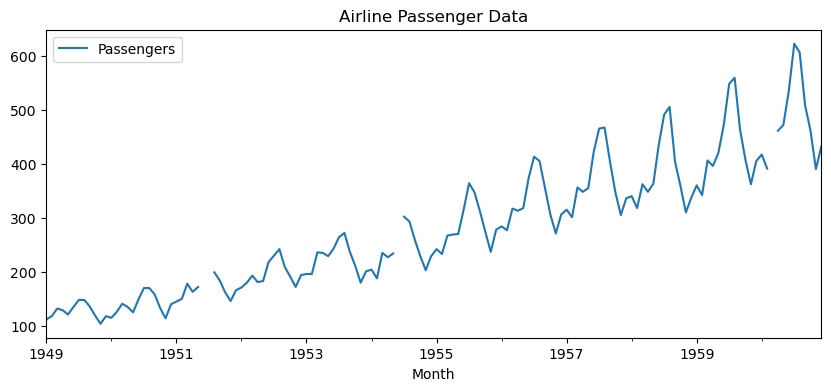

In [8]:
# Plotting the initial given time series data
data.plot(figsize=(10,4))
plt.title("Airline Passenger Data")
plt.show()

## Missing Value Treatment 

#### 1. Mean Imputation 

In [9]:
data = data.assign(Pas_mean_impute = data["Passengers"].fillna(data["Passengers"].mean()))
data

,Passengers,Pas_mean_impute
Month,,
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0
...,...,...
1960-08-01,606.0,606.0
1960-09-01,508.0,508.0
1960-10-01,461.0,461.0


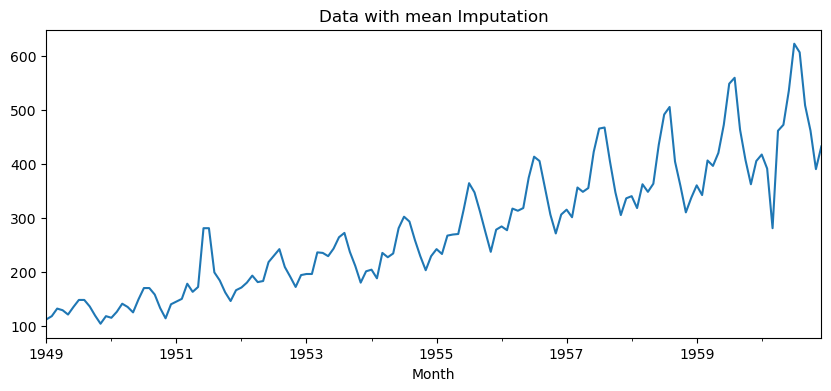

In [10]:
# Plotting/Visualizing the data with mean imputation
data["Pas_mean_impute"].plot(figsize=(10,4))
plt.title("Data with mean Imputation")
plt.show()

#### 2. Linear Interpolation 

In [11]:
# Pas_lininter is the column with linear interpolation
data = data.assign(Pas_lininter = data["Passengers"].interpolate(method="linear"))
data

,Passengers,Pas_mean_impute,Pas_lininter
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0
...,...,...,...
1960-08-01,606.0,606.0,606.0
1960-09-01,508.0,508.0,508.0
1960-10-01,461.0,461.0,461.0


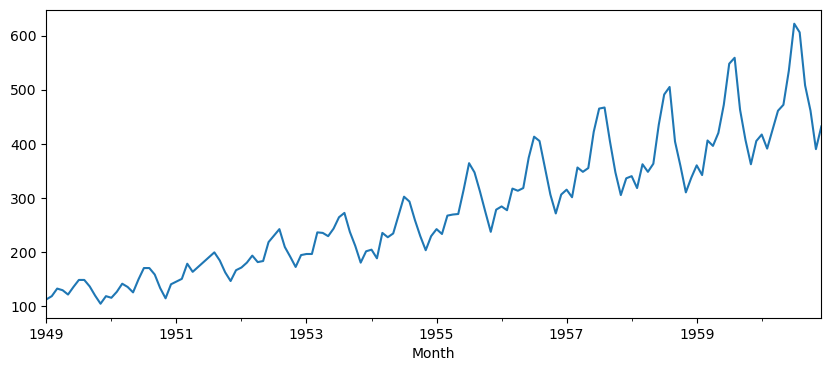

In [12]:
# Visualize the linear interpolation method
data["Pas_lininter"].plot(figsize=(10,4))
plt.show()

In [13]:
data.columns

Index(['Passengers', 'Pas_mean_impute', 'Pas_lininter'], dtype='object')

In [14]:
# Assign the linear interpolation column to Passengers column - Final choice of method for filling missing values is linear interpolation

data["Passengers"] = data["Pas_lininter"]

In [15]:
data1 = data.drop(columns = ["Pas_mean_impute","Pas_lininter"])
data1

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


## Outlier Analysis 

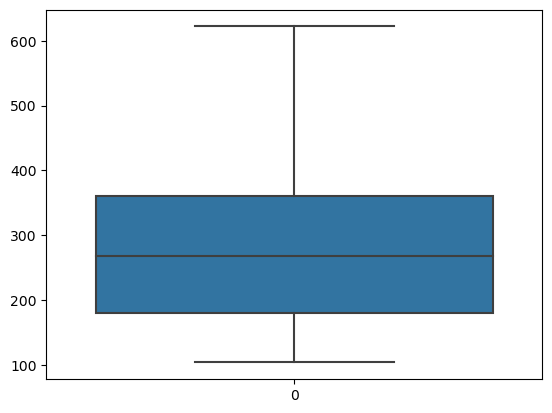

In [16]:
sns.boxplot(data1["Passengers"])
plt.show()

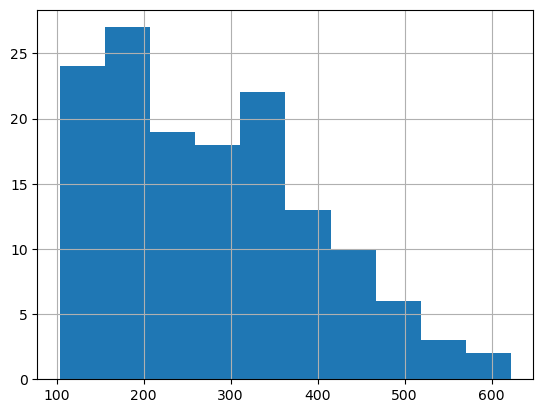

In [17]:
data1["Passengers"].hist()
plt.show()

There are no outliers in the data, hence no treatment required

# TIME SERIES ANALYSIS

#  Decomposition of Time Series Data

In [18]:
# Import the package for decomposition
import statsmodels.api as sm

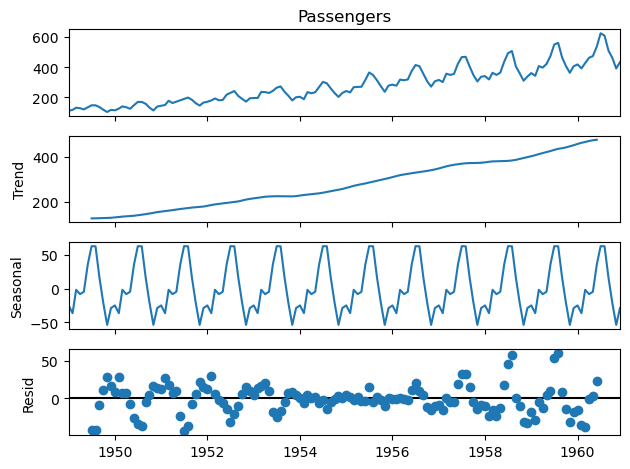

In [19]:
# Additive Decomposition
decomposition = sm.tsa.seasonal_decompose(data1["Passengers"],model = "additive")
fig = decomposition.plot()
plt.show()

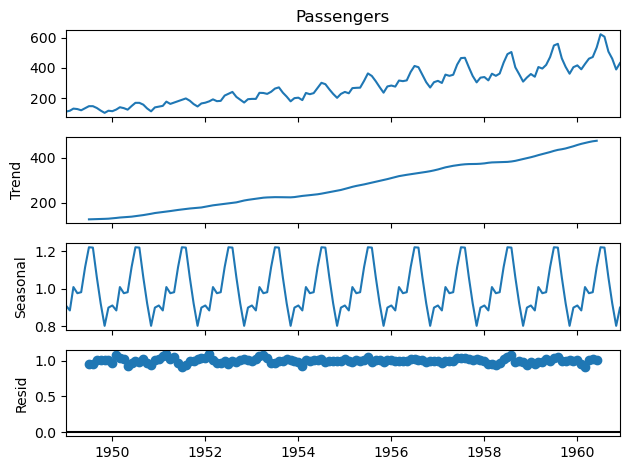

In [20]:
# Multiplicative Decomposition

decomposition = sm.tsa.seasonal_decompose(data1["Passengers"],model = "multiplicative")
fig = decomposition.plot()
plt.show()

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


# TIME SERIES FORECASTING

### Split the data into train and test 

In [22]:
# taking 120 months for training dataset
train_len = 120

In [23]:
# Splitting dataset into train and test

train = data1[0:train_len]
test = data1[train_len:]

In [24]:
train

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1958-08-01,505.0
1958-09-01,404.0
1958-10-01,359.0


In [25]:
test

,Passengers
Month,
1959-01-01,360.0
1959-02-01,342.0
1959-03-01,406.0
1959-04-01,396.0
1959-05-01,420.0
1959-06-01,472.0
1959-07-01,548.0
1959-08-01,559.0
1959-09-01,463.0


## SMOOTHING TECHNIQUES - SIMPLE TECHNIQUES WITHOUT REGRESSION

### Naive Forecasting

In [26]:
y_hat_naive = test.copy()

In [27]:
train

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1958-08-01,505.0
1958-09-01,404.0
1958-10-01,359.0


In [28]:
train["Passengers"][train_len-1]

337.0

In [29]:
y_hat_naive["naive_forecast"] = train["Passengers"][train_len-1]

In [30]:
y_hat_naive.columns

Index(['Passengers', 'naive_forecast'], dtype='object')

In [31]:
y_hat_naive

,Passengers,naive_forecast
Month,,
1959-01-01,360.0,337.0
1959-02-01,342.0,337.0
1959-03-01,406.0,337.0
1959-04-01,396.0,337.0
1959-05-01,420.0,337.0
1959-06-01,472.0,337.0
1959-07-01,548.0,337.0
1959-08-01,559.0,337.0
1959-09-01,463.0,337.0


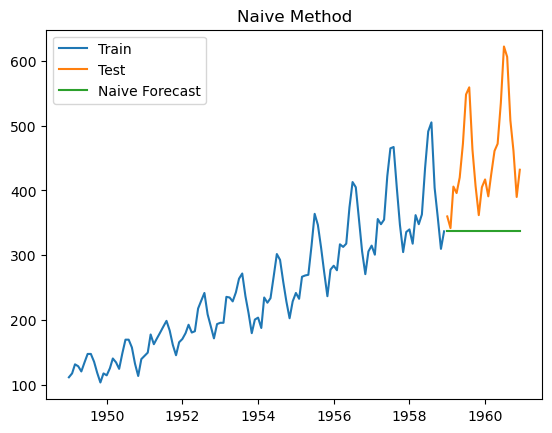

In [32]:
plt.plot(train["Passengers"],label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_naive["naive_forecast"],label = "Naive Forecast")
plt.legend(loc="best")
plt.title("Naive Method")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

#calculate root mean squared error
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_naive["naive_forecast"])).round(2)

#Calculate - Mean absolute percentage error
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_naive["naive_forecast"])/test["Passengers"])*100,2)

In [34]:
rmse

137.51

In [35]:
mape

23.63

In [36]:
results = pd.DataFrame({"Method":["Naive Method"],"MAPE":[mape],"RMSE":[rmse]})
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51


# Simple Average Method

In [37]:
y_hat_average = test.copy()

In [38]:
y_hat_average["Average_forecast"] = train["Passengers"].mean()

In [39]:
y_hat_average

,Passengers,Average_forecast
Month,,
1959-01-01,360.0,245.891667
1959-02-01,342.0,245.891667
1959-03-01,406.0,245.891667
1959-04-01,396.0,245.891667
1959-05-01,420.0,245.891667
1959-06-01,472.0,245.891667
1959-07-01,548.0,245.891667
1959-08-01,559.0,245.891667
1959-09-01,463.0,245.891667


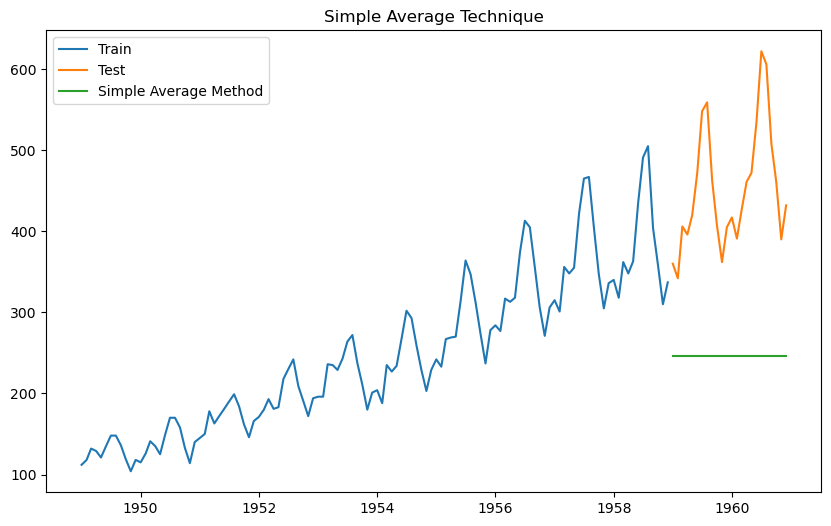

In [40]:
plt.figure(figsize=(10,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_average["Average_forecast"],label = "Simple Average Method")
plt.legend(loc="best")
plt.title("Simple Average Technique")
plt.show()

In [41]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_average["Average_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_average["Average_forecast"])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["Simple Average"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69


# Simple Moving Average

In [42]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma ["sma_forecast"] = data["Passengers"].rolling(ma_window).mean()

y_hat_sma["sma_forecast"][train_len:] = y_hat_sma["sma_forecast"][train_len-1]

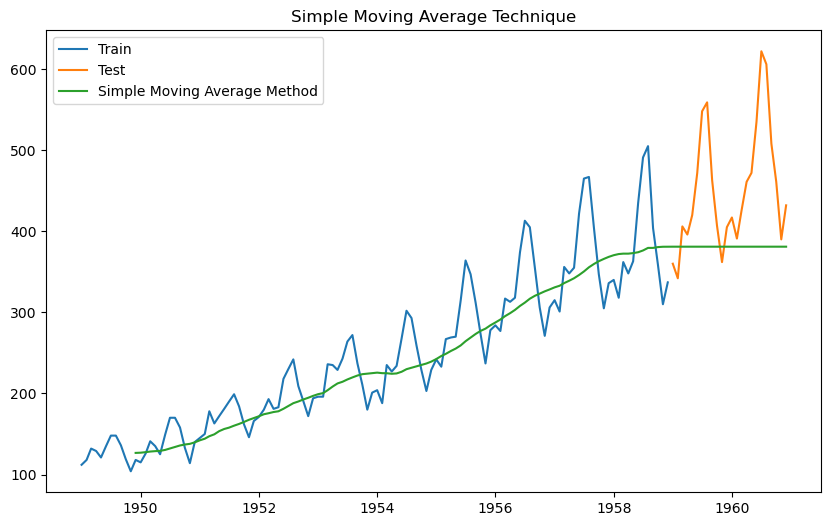

In [43]:
plt.figure(figsize=(10,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_sma["sma_forecast"],label = "Simple Moving Average Method")
plt.legend(loc="best")
plt.title("Simple Moving Average Technique")
plt.show()

In [44]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_sma["sma_forecast"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_sma["sma_forecast"][train_len:])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["Simple Moving Average"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33


# Exponential Smoothing Technique

### SIMPLE EXPONENTIAL SMOOTHING 

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [46]:
model = SimpleExpSmoothing(train["Passengers"])

C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_fit = model.fit(smoothing_level=0.15)

C:\Users\alkap\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [48]:
model_fit.params

{'smoothing_level': 0.15,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
y_hat_ses = test.copy()

In [50]:
test.shape

(24, 1)

In [51]:
y_hat_ses["ses_forecast"] = model_fit.forecast(24)

In [52]:
y_hat_ses

,Passengers,ses_forecast
Month,,
1959-01-01,360.0,376.642994
1959-02-01,342.0,376.642994
1959-03-01,406.0,376.642994
1959-04-01,396.0,376.642994
1959-05-01,420.0,376.642994
1959-06-01,472.0,376.642994
1959-07-01,548.0,376.642994
1959-08-01,559.0,376.642994
1959-09-01,463.0,376.642994


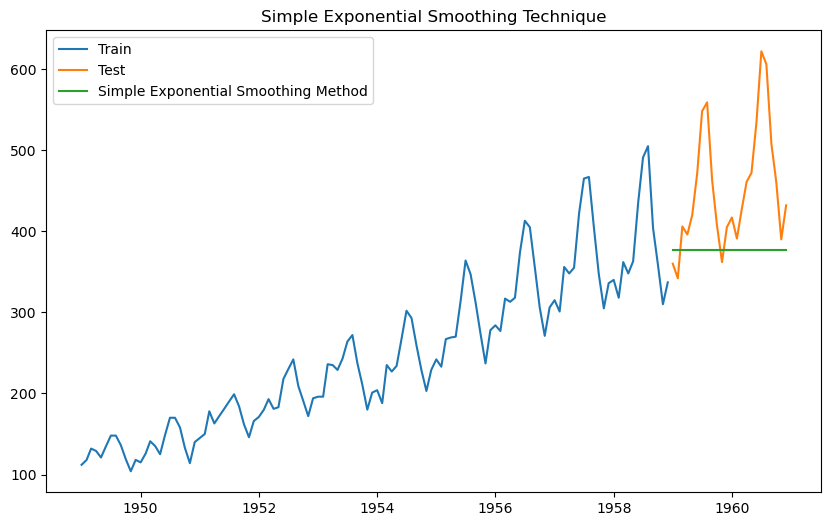

In [53]:
plt.figure(figsize=(10,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_ses["ses_forecast"],label = "Simple Exponential Smoothing Method")
plt.legend(loc="best")
plt.title("Simple Exponential Smoothing Technique")
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_ses["ses_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_ses["ses_forecast"])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["Simple Exp Smoothing"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39


### Holts method - including Trend component

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
model = ExponentialSmoothing(train["Passengers"],trend="additive",seasonal=None)

C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
model_fit = model.fit(smoothing_level = 0.2,smoothing_slope = 0.01, optimized = False)

C:\Users\alkap\AppData\Local\Temp\ipykernel_25160\964018663.py:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level = 0.2,smoothing_slope = 0.01, optimized = False)


In [58]:
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.4666666666666, 'initial_trend': 2.0606060606060685, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [59]:
y_hat_holt = test.copy()
y_hat_holt["holt_forecast"] = model_fit.forecast(len(test))

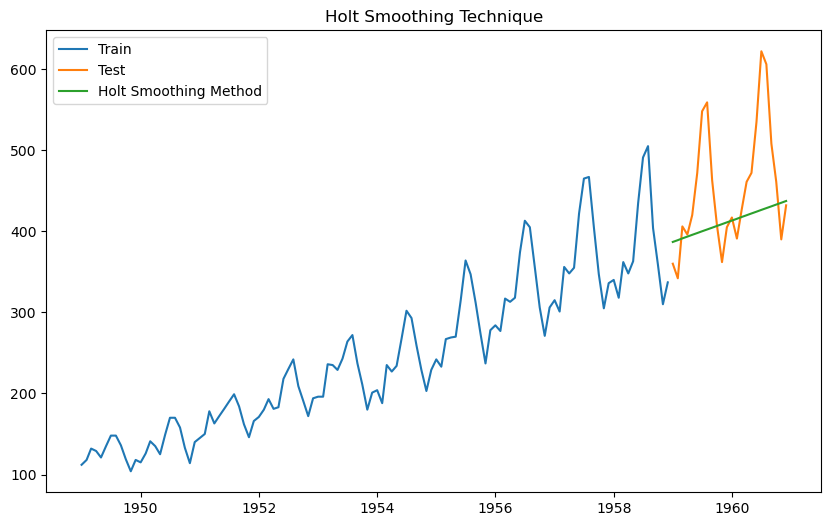

In [60]:
plt.figure(figsize=(10,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_holt["holt_forecast"],label = "Holt Smoothing Method")
plt.legend(loc="best")
plt.title("Holt Smoothing Technique")
plt.show()

In [61]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_holt["holt_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_holt["holt_forecast"])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["Holt Smoothing"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91


# Holt Winters Additive

In [62]:
y_hat_hw = test.copy()

model = ExponentialSmoothing(train["Passengers"],seasonal_periods = 12, trend = "additive", seasonal= "additive")

model_fit = model.fit()

print(model_fit.params)

y_hat_hw["hw_forecast"] = model_fit.forecast(24)

C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.23610437571277568, 'smoothing_trend': 3.0637578825093784e-09, 'smoothing_seasonal': 0.7638956098651056, 'damping_trend': nan, 'initial_level': 119.15354729252832, 'initial_trend': 2.2766754716920725, 'initial_seasons': array([ -9.45090642,  -3.90304822,   8.64002426,   3.54301231,
        -5.15583153,   8.98295408,  21.23748472,  19.32228904,
         5.23100376, -13.62321028, -28.3092619 , -12.13789761]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


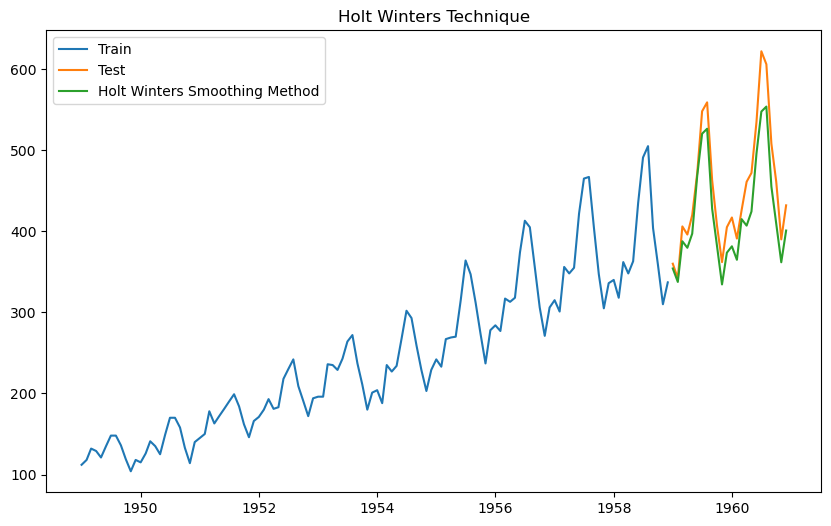

In [63]:
plt.figure(figsize=(10,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_hw["hw_forecast"],label = "Holt Winters Smoothing Method")
plt.legend(loc="best")
plt.title("Holt Winters Technique")
plt.show()

In [64]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_hw["hw_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_hw["hw_forecast"])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["Holt Winters"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91
0,Holt Winters,6.72,35.87


# Holt Winters Multiplicative

In [65]:
y_hat_hwm = test.copy()

model = ExponentialSmoothing(train["Passengers"],seasonal_periods = 12, trend = "additive", seasonal= "mul")

model_fit = model.fit()

print(model_fit.params)

y_hat_hwm["hw_forecast"] = model_fit.forecast(24)

C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.36559682299584, 'smoothing_trend': 1.586781473370132e-08, 'smoothing_seasonal': 0.634403172685563, 'damping_trend': nan, 'initial_level': 99.21591156498809, 'initial_trend': 2.1487506371596696, 'initial_seasons': array([1.10492019, 1.16222843, 1.27748564, 1.21447113, 1.12096039,
       1.22583823, 1.33302968, 1.32397995, 1.20775992, 1.0524718 ,
       0.93568345, 1.07949293]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


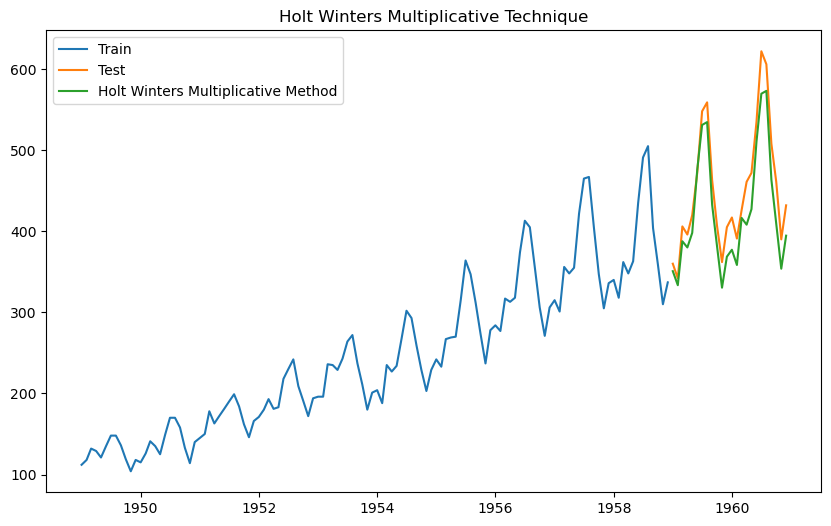

In [66]:
plt.figure(figsize=(10,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_hwm["hw_forecast"],label = "Holt Winters Multiplicative Method")
plt.legend(loc="best")
plt.title("Holt Winters Multiplicative Technique")
plt.show()

In [67]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_hwm["hw_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_hwm["hw_forecast"])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["Holt Winters Multiplicative"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91
0,Holt Winters,6.72,35.87
0,Holt Winters Multiplicative,6.45,32.45


# Auto Regressive Models

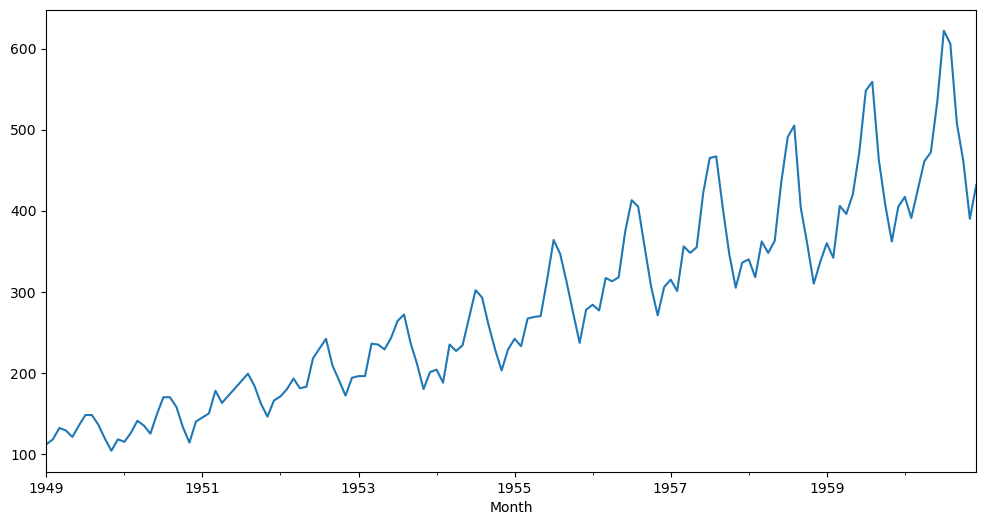

In [68]:
data1["Passengers"].plot(figsize = (12,6))
plt.show()

### Checking Stationarity of the above series using:

1. ADF (Augmented Dickey Fuller Test) : (Null hypothesis is series is not stationary)
2. KPSS ( Kwiatkowski-Phillips-Schmidt-Shinn) Test :( Null hypothesis is series is stationary)

In [69]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data1["Passengers"])

print("ADF statistic = ",adf_test[0])
print("P-value : ",adf_test[1])

ADF statistic =  0.8946087940823905
P-value :  0.9930195647605924


P value is not less than 5%, hence series is non-stationary and we fail to reject the null hypothesis

In [70]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data1["Passengers"])


print("KPSS Stat:", kpss_test[0])
print("P-value is :",kpss_test[1])

KPSS Stat: 1.6511897469421617
P-value is : 0.01


C:\Users\alkap\AppData\Local\Temp\ipykernel_25160\2651116785.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(data1["Passengers"])


Since p value is less than 5%, you will reject the null hypothesis, hence confirming that the series is not stationary

# Convert non stationary series to stationary using Boxcox transformation and Differencing

## Box cox transformation to make variance constant 

In [71]:
from scipy.stats import boxcox

In [72]:
data_boxcox = pd.Series(boxcox(data1["Passengers"],lmbda=0),index=data1.index)

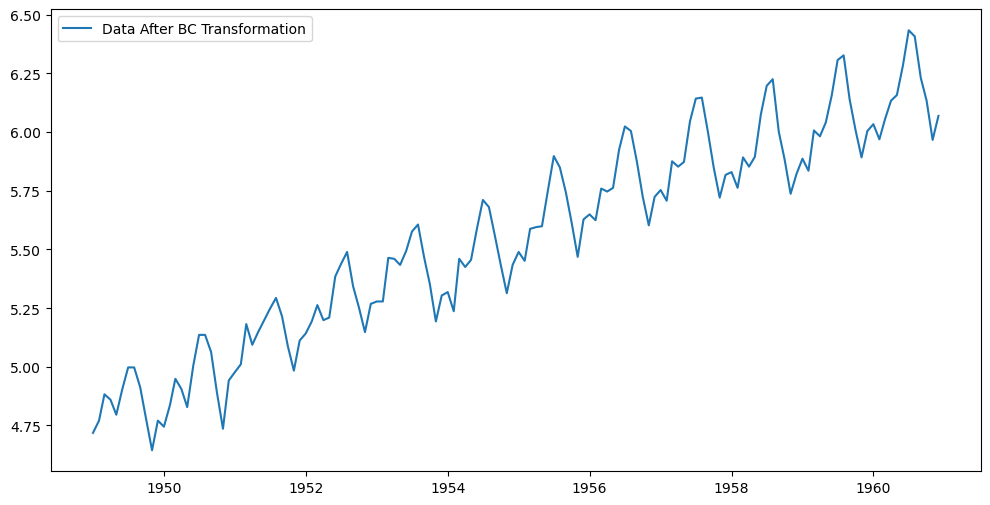

In [73]:
plt.figure(figsize=(12,6))
plt.plot(data_boxcox,label = "Data After BC Transformation")
plt.legend()
plt.show()

## Differencing to make the mean constant

In [74]:
data_bc_diff = pd.Series(data_boxcox-data_boxcox.shift(),index = data1.index)

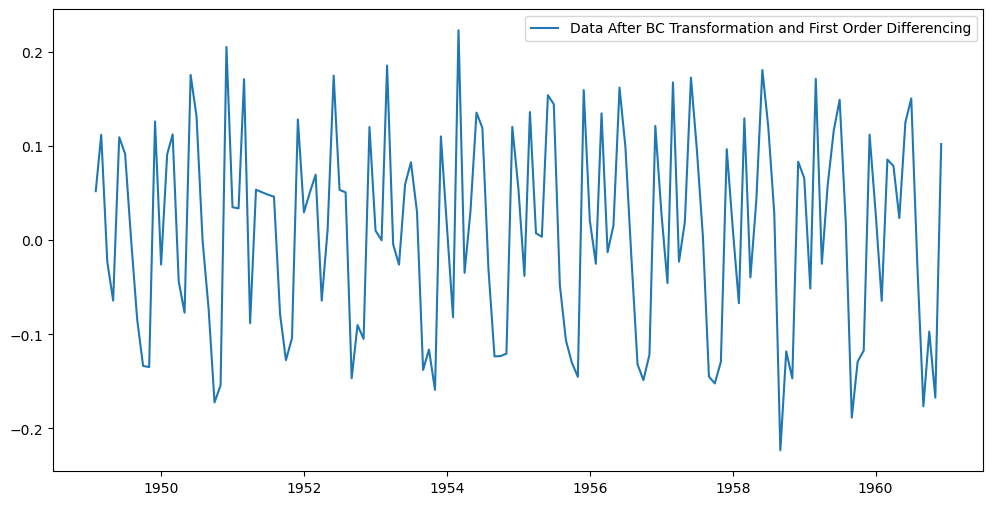

In [75]:
plt.figure(figsize=(12,6))
plt.plot(data_bc_diff,label = "Data After BC Transformation and First Order Differencing")
plt.legend()
plt.show()

In [76]:
data_bc_diff.isna()

Month
1949-01-01     True
1949-02-01    False
1949-03-01    False
1949-04-01    False
1949-05-01    False
              ...  
1960-08-01    False
1960-09-01    False
1960-10-01    False
1960-11-01    False
1960-12-01    False
Length: 144, dtype: bool

In [77]:
# Dropping Na values which are created due to lag

data_bc_diff.dropna(inplace=True)

In [78]:
data_bc_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 143, dtype: float64

In [79]:
# Check the ADF test for stationarity again:

adf_test2 = adfuller(data_bc_diff)

print("ADF statistic = ",adf_test2[0])
print("P-value : ",adf_test2[1])

ADF statistic =  -3.2901138184594108
P-value :  0.015326212237944533


p values is less than 5%, so null hypothesis will be rejected, i.e series is now stationary

## Creating ACF plot 

In [80]:
from statsmodels.graphics.tsaplots import plot_acf

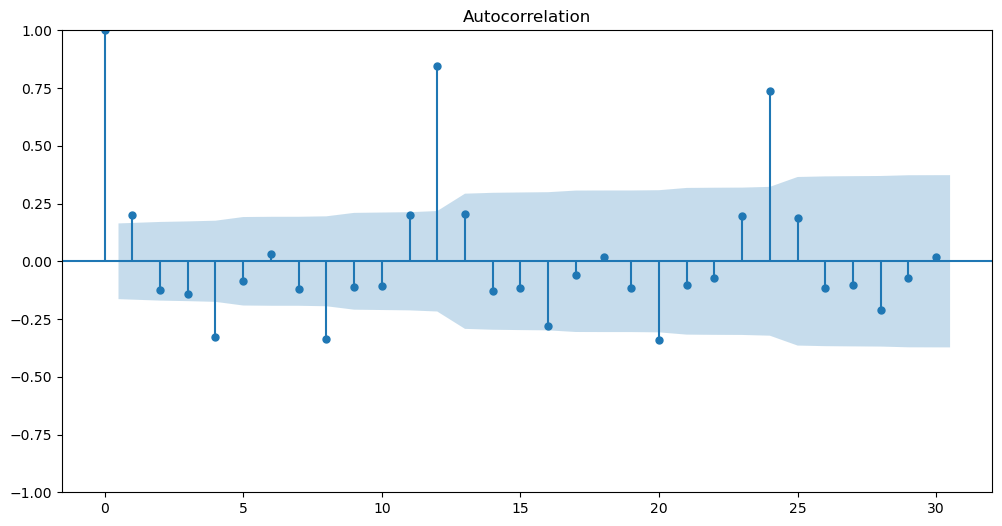

In [81]:
plt.figure(figsize=(12,6))
plot_acf(data_bc_diff,ax = plt.gca(), lags =30)
plt.show()

## Creating PACF plot 

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf

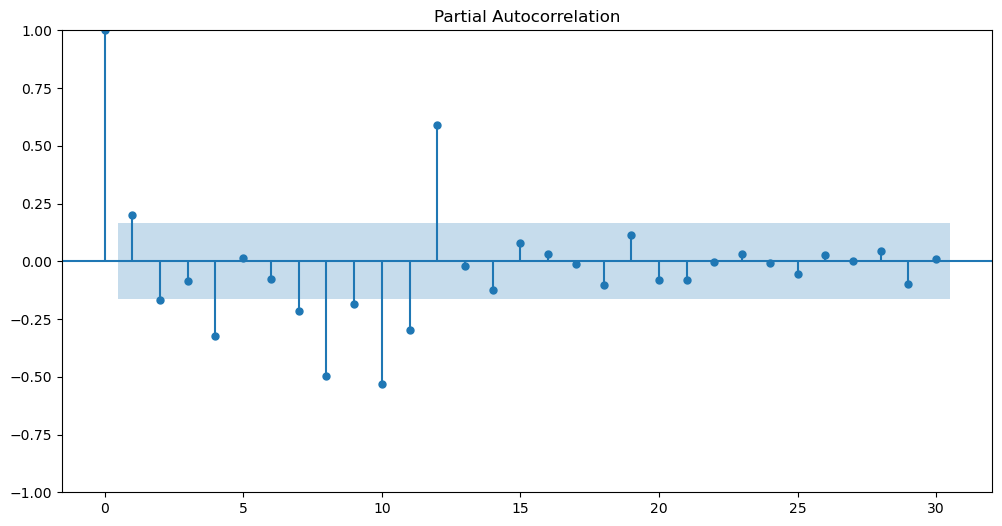

In [83]:
plt.figure(figsize=(12,6))
plot_pacf(data_bc_diff,ax = plt.gca(), lags =30)
plt.show()

In [84]:
data_bc_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 143, dtype: float64

In [85]:
train_data_bc = data_boxcox[:train_len]
test_data_bc = data_boxcox[train_len:]

train_data_bc_diff = data_bc_diff[:train_len]
test_data_bc_diff = data_bc_diff[train_len:]

#  AR (Auto Regressive Model)

In [86]:
from statsmodels.tsa.arima.model import ARIMA


In [87]:
model = ARIMA(train_data_bc_diff, order = (1,0,0))
model_fit = model.fit()
print(model_fit.params)

const     0.009918
ar.L1     0.185527
sigma2    0.010606
dtype: float64


C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
train_data_bc_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
Length: 120, dtype: float64

In [89]:
test_data_bc_diff

Month
1959-02-01   -0.051293
1959-03-01    0.171542
1959-04-01   -0.024939
1959-05-01    0.058841
1959-06-01    0.116724
1959-07-01    0.149296
1959-08-01    0.019874
1959-09-01   -0.188422
1959-10-01   -0.128914
1959-11-01   -0.117169
1959-12-01    0.112243
1960-01-01    0.029199
1960-02-01   -0.064379
1960-03-01    0.085732
1960-04-01    0.078959
1960-05-01    0.023581
1960-06-01    0.125288
1960-07-01    0.150673
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
dtype: float64

### Recover the original time series data back 

In [90]:
data_bc_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 143, dtype: float64

In [91]:
data_bc_diff.index.min()

Timestamp('1949-02-01 00:00:00')

In [92]:
data_bc_diff.index.max()

Timestamp('1960-12-01 00:00:00')

In [93]:
y_hat_ar = data_bc_diff.copy()

y_hat_ar["ar_forecast_bc_diff"] = model_fit.predict(start = data_bc_diff.index.min(),end = data_bc_diff.index.max())

In [94]:
y_hat_ar

Month
1949-02-01 00:00:00                                             0.052186
1949-03-01 00:00:00                                             0.112117
1949-04-01 00:00:00                                             -0.02299
1949-05-01 00:00:00                                            -0.064022
1949-06-01 00:00:00                                             0.109484
                                             ...                        
1960-09-01 00:00:00                                            -0.176399
1960-10-01 00:00:00                                            -0.097083
1960-11-01 00:00:00                                            -0.167251
1960-12-01 00:00:00                                             0.102279
ar_forecast_bc_diff    1949-02-01    0.009918
1949-03-01    0.017760
...
Length: 144, dtype: object

In [95]:
y_hat_ar["ar_forecast_bc"] = y_hat_ar["ar_forecast_bc_diff"].cumsum()

y_hat_ar["ar_forecast_bc"] = y_hat_ar["ar_forecast_bc"].add(data_boxcox[0])


y_hat_ar["ar_forecast"] = np.exp(y_hat_ar["ar_forecast_bc"])

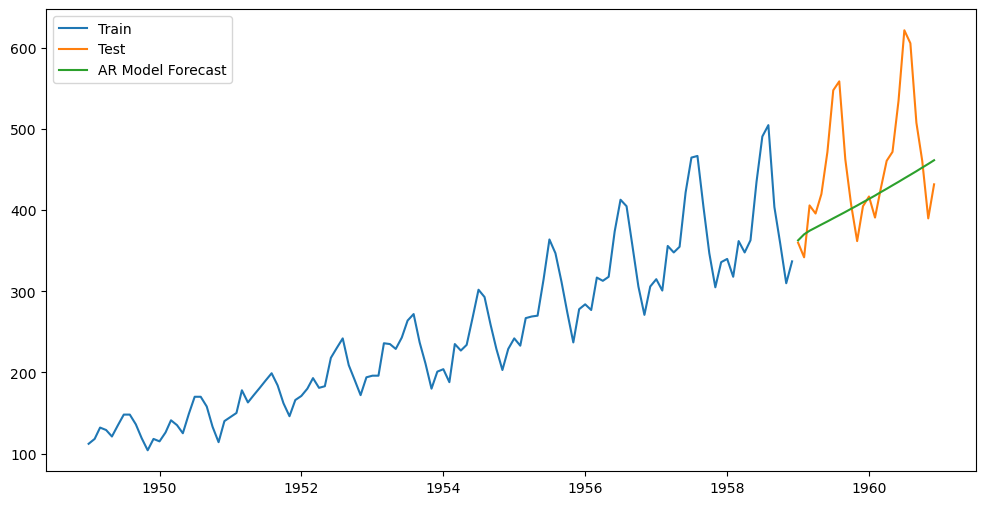

In [96]:
plt.figure(figsize=(12,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_ar["ar_forecast"][test.index.min():],label = "AR Model Forecast")
plt.legend()
plt.show()

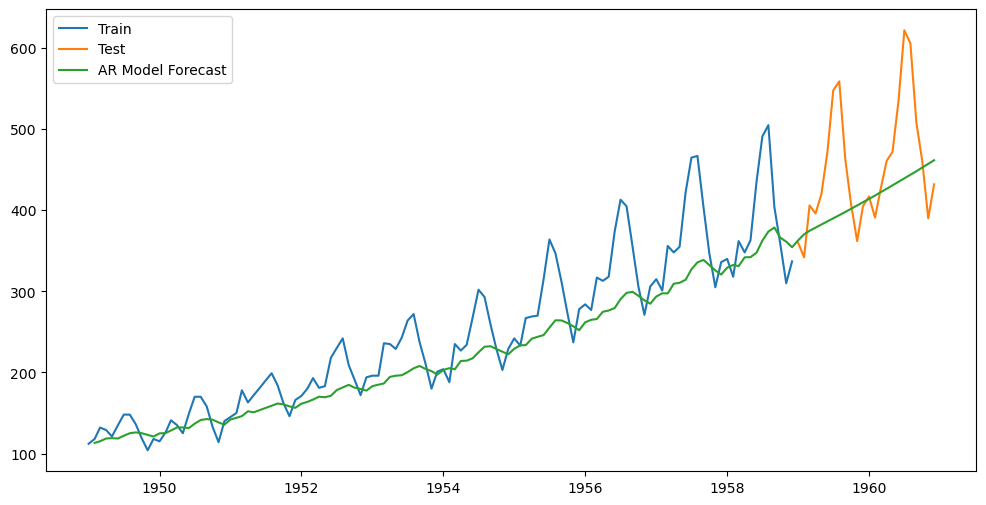

In [97]:
# Entire prediction - with train and test both
plt.figure(figsize=(12,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_ar["ar_forecast"],label = "AR Model Forecast")
plt.legend()
plt.show()

In [98]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_ar["ar_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_ar["ar_forecast"][test.index.min():])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["AR Method"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91
0,Holt Winters,6.72,35.87
0,Holt Winters Multiplicative,6.45,32.45
0,AR Method,11.36,79.47


## MA - Moving Average Model 

### ACF Plot : q parameter

In [99]:
model = ARIMA(train_data_bc_diff,order=(0,0,1))
model_fit = model.fit()
print(model_fit.params)

const     0.009816
ma.L1     0.270515
sigma2    0.010433
dtype: float64


C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [100]:
y_hat_ma = data_bc_diff.copy()
y_hat_ma["ma_forecast_bc_diff"] = model_fit.predict(data_bc_diff.index.min(),data_bc_diff.index.max())
y_hat_ma["ma_forecast_bc"] = y_hat_ma["ma_forecast_bc_diff"].cumsum()
y_hat_ma["ma_forecast_bc"] = y_hat_ma["ma_forecast_bc"].add(data_boxcox[0])
y_hat_ma["ma_forecast"] = np.exp(y_hat_ma["ma_forecast_bc"])

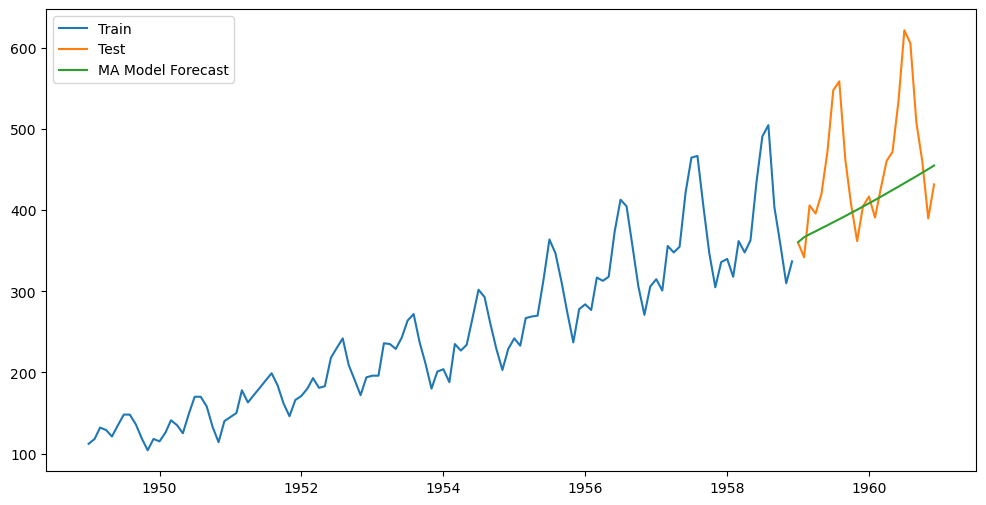

In [101]:
plt.figure(figsize=(12,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_ma["ma_forecast"][test.index.min():],label = "MA Model Forecast")
plt.legend()
plt.show()

In [102]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_ma["ma_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_ma["ma_forecast"][test.index.min():])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["MA Method"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91
0,Holt Winters,6.72,35.87
0,Holt Winters Multiplicative,6.45,32.45
0,AR Method,11.36,79.47
0,MA Method,11.79,82.30


# ARMA Model

In [103]:
model = ARIMA(train_data_bc_diff,order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.009576
ar.L1    -0.527566
ma.L1     0.798209
sigma2    0.009967
dtype: float64


In [104]:
y_hat_arma = data_bc_diff.copy()

y_hat_arma["arma_forecast_boxcox_diff"] = model_fit.predict(data_bc_diff.index.min(),data_bc_diff.index.max())

In [105]:
y_hat_arma["arma_forecast_boxcox"] = y_hat_arma["arma_forecast_boxcox_diff"].cumsum()

In [106]:
y_hat_arma["arma_forecast_boxcox"] = y_hat_arma["arma_forecast_boxcox"].add(data_boxcox[0])


In [107]:
y_hat_arma["arma_forecast"] = np.exp(y_hat_arma["arma_forecast_boxcox"])

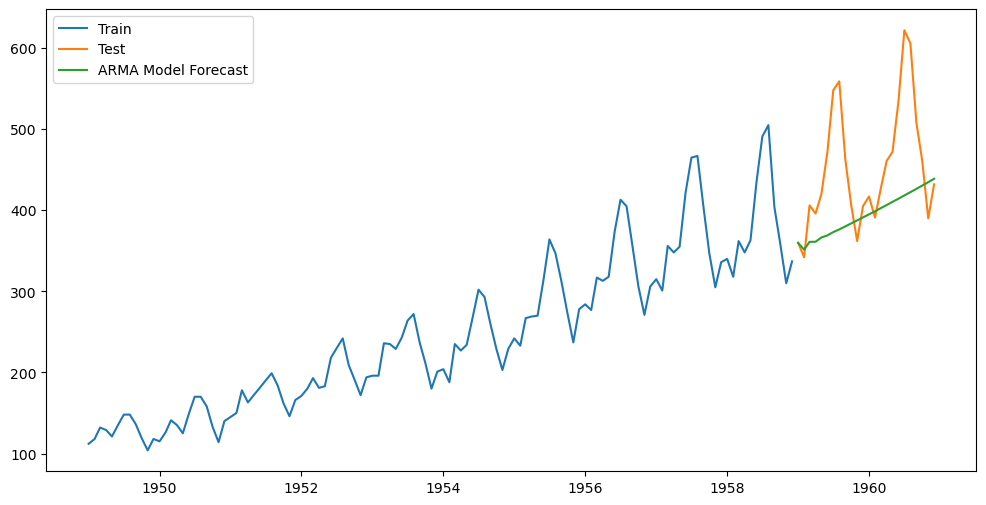

In [108]:
plt.figure(figsize=(12,6))
plt.plot(train["Passengers"],label="Train")
plt.plot(test["Passengers"],label = "Test")
plt.plot(y_hat_arma["arma_forecast"][test.index.min():],label = "ARMA Model Forecast")
plt.legend()
plt.show()

In [109]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_arma["arma_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_arma["arma_forecast"][test.index.min():])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["ARMA Method"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91
0,Holt Winters,6.72,35.87
0,Holt Winters Multiplicative,6.45,32.45
0,AR Method,11.36,79.47
0,MA Method,11.79,82.30
0,ARMA Method,13.12,90.43


# ARIMA

In [111]:
model = ARIMA(train_data_bc_diff,order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ar.L1     0.195489
ma.L1    -0.999951
sigma2    0.010696
dtype: float64


In [112]:
y_hat_arima = data_bc_diff.copy()
y_hat_arima["arima_forecast_bc_diff"] = model_fit.predict(data_bc_diff.index.min(),data_bc_diff.index.max())
y_hat_arima["arima_forecast_bc"] = y_hat_arima["arima_forecast_bc_diff"].cumsum()
y_hat_arima["arima_forecast_bc"] = y_hat_arima["arima_forecast_bc"].add(data_boxcox[0])
y_hat_arima["arima_forecast"] = np.exp(y_hat_arima["arima_forecast_bc"])

In [113]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_arima["arima_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_arima["arima_forecast"][test.index.min():])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["ARIMA Method"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91
0,Holt Winters,6.72,35.87
0,Holt Winters Multiplicative,6.45,32.45
0,AR Method,11.36,79.47
0,MA Method,11.79,82.30
0,ARMA Method,13.12,90.43


# SARIMA

In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [116]:
model = SARIMAX(train_data_bc_diff,order=(1,1,1),seasonal_order = (1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ar.L1      -0.251610
ma.L1      -0.993247
ar.S.L12   -0.074550
ma.S.L12   -0.488327
sigma2      0.001472
dtype: float64


C:\Users\alkap\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
y_hat_sarima = data_bc_diff.copy()
y_hat_sarima["sarima_forecast_bc_diff"] = model_fit.predict(data_bc_diff.index.min(),data_bc_diff.index.max())
y_hat_sarima["sarima_forecast_bc"] = y_hat_sarima["sarima_forecast_bc_diff"].cumsum()
y_hat_sarima["sarima_forecast_bc"] = y_hat_sarima["sarima_forecast_bc"].add(data_boxcox[0])
y_hat_sarima["sarima_forecast"] = np.exp(y_hat_sarima["sarima_forecast_bc"])

In [119]:
rmse = np.sqrt(mean_squared_error(test["Passengers"],y_hat_sarima["sarima_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_sarima["sarima_forecast"][test.index.min():])/test["Passengers"])*100,2)
temp = pd.DataFrame({"Method":["SARIMA Method"],"MAPE":[mape],"RMSE":[rmse]})
results = pd.concat([results,temp])
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
0,Simple Average,44.28,219.69
0,Simple Moving Average,15.54,103.33
0,Simple Exp Smoothing,16.22,106.39
0,Holt Smoothing,11.39,80.91
0,Holt Winters,6.72,35.87
0,Holt Winters Multiplicative,6.45,32.45
0,AR Method,11.36,79.47
0,MA Method,11.79,82.30
0,ARMA Method,13.12,90.43
